# Wrangling Act

## Gather

##### We import prelimenary libraries first:

In [1]:
import pandas as pd
import numpy as np

#### And read by pandas ".read_csv()" function the file "twitter-archive-enhanced.csv"

In [5]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### We take a quick glimse at df1' shape

In [7]:
df_1.shape

(2356, 17)

#### Then we download 'image-predictions.tsv' file programmatically and store it in an 'ImagePredictions' folder. 

In [8]:
import requests
import os
folder_name = 'ImagePredictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

#### After that we create our df2 dataframe with the following approach:

In [9]:
df_2 = pd.read_csv('ImagePredictions/image-predictions.tsv', sep='\t')
df_2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_2.shape

(2075, 12)

#### we can compile additional Data via the Twitter API:

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

#### From the resulting 'tweet_json.txt' file from the above algorithm, we can read every line of it and append to a list: 

In [12]:
import json
with open('tweet_json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

#### From that list we will build our 3rd dataframe:

In [13]:
df_3 = pd.DataFrame(status)
df_3.head()#[['id', 'retweet_count', 'favorite_count']]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


## Assess

### Visual assessment

- When we look all the three dataframes we can see they have numerous columns that are not necessary for our alalysis.
- When we look at the first dataframe we can see four dog stages columns of df_1 doesn't follow the rules of tidiness.
- When we lood at all three datafames we feel it makes sense if unite them all.
- In 2nd dataframe column names should be corrected.

### Programmatic assessment

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df_1.retweeted_status_id.isnull().sum()

2175

In [19]:
df_1['tweet_id'].duplicated().sum()

0

In [20]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
('pupper' in df_1.pupper)

False

In [22]:
df_1[(df_1.rating_numerator > 15) | (df_1.rating_denominator > 15)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [23]:
df_1.expanded_urls.duplicated().sum()

137

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_2.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
padlock                 1
fiddler_crab            1
cheeseburger            1
water_bottle            1
bee_eater               1
Name: p1, Length: 378, dtype: int64

In [27]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

#### Tidiness:

- Unnecessary columns should be dropped.
- Four dog stages columns of df_1 shuold 'melted' into one column.
- All three dataframes (df_1, df_2, df_3) should be in one dataframe.
- In df_1 and df_3 dataframes some tweets are duplicated or retweets. We should get rid of them.

#### Quality:

- Majority of column values of four dog stages columns of df_1 are 'None's. They shuold be replaced with NaNs.
- Majority of column values of four dog stages columns of df_1 are 'None's. They should be completed.
- in df_1 timestamp column's format is string. We should convert them into timestamp format.
- Several dog ratings (both numerator and denominator) are exremely high. That should be tackled.
- Several dog names are 'a's. Are they really 'a's or typos. Clearification is needed.
- Several dog names are 'None's. They should be completed (at least visually).
- 14 tweets (2370 - 2356 = 14) have more than one dog grade names.*
- In 2nd dataframe column names should be corrected.

## Clean



#### Define

##### Unnecessary columns should be dropped. For exapmle, in df_2 we should choose the columns that classify breeds of dogs in highest confidence. For that  we can use pandas .drop() function.

#### Code

In [28]:
((df_1['doggo'] == 'None') & (df_1['floofer'] == 'None') & 
           (df_1['pupper'] == 'None') & (df_1['puppo'] == 'None')).sum()

1976

In [29]:
df_1_clean = df_1.copy()
df_1_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source'], axis=1, inplace=True)

In [58]:
df_2_clean = df_2.copy()
df_2_clean.drop(['jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [31]:
df_3_clean = df_3[['id', 'user', 'retweeted_status', 'retweet_count', 'favorite_count']].copy()
df_3_clean.head()

,id,user,retweeted_status,retweet_count,favorite_count
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,8853,39467
1,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,6514,33819
2,891815181378084864,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,4328,25461
3,891689557279858688,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,8964,42908
4,891327558926688256,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,9774,41048


#### Test

In [32]:
df_1_clean.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [33]:
df_2_clean.head(1)

,tweet_id,p1
0,666020888022790149,Welsh_springer_spaniel


In [34]:
df_3_clean.head(1)

,id,user,retweeted_status,retweet_count,favorite_count
0,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,8853,39467


#### Define

##### Four dog stages columns of df_1 shuold 'melted' into one column. For that we will use pandas .melt() function. Before, considering majority of column values of four dog stages columns of df_1 are 'None's and they shuold be replaced with NaNs, we will replace 'None's with NaNs in rows if a dog has no dog stage. Finally we will drop "off-product" column (['variable']).


#### Code

In [35]:
import numpy as np

In [36]:
df_1_clean.loc[(df_1_clean['doggo'] == 'None') & (df_1_clean['floofer'] == 'None') & 
           (df_1_clean['pupper'] == 'None') & (df_1_clean['puppo'] == 'None'), ['doggo', 'floofer', 'pupper', 'puppo']] = np.nan
#subtest:
df_1_clean[['doggo', 'floofer', 'pupper', 'puppo']].isnull().sum()

doggo      1976
floofer    1976
pupper     1976
puppo      1976
dtype: int64

In [37]:
df_1_clean = pd.melt(df_1_clean, id_vars = ['tweet_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name = 'Grade_name' )

In [38]:
df_1_clean.drop(df_1_clean[df_1_clean.Grade_name == 'None'].index, inplace=True)

In [39]:
df_1_clean.drop(columns=['variable'], inplace=True)

In [40]:
df_1_clean.drop_duplicates(subset=['tweet_id', 'Grade_name'], inplace=True)
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 8151
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2370 non-null   int64  
 1   timestamp                   2370 non-null   object 
 2   text                        2370 non-null   object 
 3   retweeted_status_id         183 non-null    float64
 4   retweeted_status_user_id    183 non-null    float64
 5   retweeted_status_timestamp  183 non-null    object 
 6   expanded_urls               2311 non-null   object 
 7   rating_numerator            2370 non-null   int64  
 8   rating_denominator          2370 non-null   int64  
 9   name                        2370 non-null   object 
 10  Grade_name                  394 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 222.2+ KB


#### *It looks like that we should reiterate, 14 tweets (2370 - 2356 = 14) have more than one dog grade names. We can clean it on the spot:

In [41]:
df_1_clean.drop_duplicates(subset=['tweet_id'], inplace=True)
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_user_id    181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   expanded_urls               2297 non-null   object 
 7   rating_numerator            2356 non-null   int64  
 8   rating_denominator          2356 non-null   int64  
 9   name                        2356 non-null   object 
 10  Grade_name                  380 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 220.9+ KB


In [42]:
df_1_clean = df_1_clean.reset_index(drop=True)

#### Test

In [43]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   timestamp                   2356 non-null   object 
 2   text                        2356 non-null   object 
 3   retweeted_status_id         181 non-null    float64
 4   retweeted_status_user_id    181 non-null    float64
 5   retweeted_status_timestamp  181 non-null    object 
 6   expanded_urls               2297 non-null   object 
 7   rating_numerator            2356 non-null   int64  
 8   rating_denominator          2356 non-null   int64  
 9   name                        2356 non-null   object 
 10  Grade_name                  380 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 202.6+ KB


#### Define

##### In df_1 and df_3 dataframes some tweets are retweets. We should get rid of them. For that we will use conditional selecting operations:

#### Code

In [44]:
df_1_clean = df_1_clean[df_1_clean.retweeted_status_id.isnull()]
df_1_clean = df_1_clean.reset_index(drop=True)

In [45]:
df_3_clean = df_3_clean[df_3_clean.retweeted_status.isnull()]

In [46]:
df_3_clean = df_3_clean.reset_index(drop=True)

#### Test

In [47]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   text                        2175 non-null   object 
 3   retweeted_status_id         0 non-null      float64
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   expanded_urls               2117 non-null   object 
 7   rating_numerator            2175 non-null   int64  
 8   rating_denominator          2175 non-null   int64  
 9   name                        2175 non-null   object 
 10  Grade_name                  344 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 187.0+ KB


In [48]:
df_3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                2175 non-null   int64 
 1   user              2175 non-null   object
 2   retweeted_status  0 non-null      object
 3   retweet_count     2175 non-null   int64 
 4   favorite_count    2175 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 85.1+ KB


#### Define

#### Majority of column values of four dog stages columns of df_1 are NaNs (after the melting operation). They should be completed. For that we look for from the 'text' column. If these texts contain any grade name, we will complete the 'NaN's. For that we will use .extract() and .fillna() functions.

In [49]:
import re
dog_grades = ['doggo', 'floofer', 'pupper', 'puppo']
df_1_clean['EXTRACT'] = df_1_clean.text.str.extract('({})'.format('|'.join(dog_grades)), 
                        flags=re.IGNORECASE, expand=False).str.lower().fillna(np.nan)
df_1_clean['EXTRACT'].count()

385

In [50]:
df_1_clean['Grade_name'] = df_1_clean['Grade_name'].fillna(df_1_clean['EXTRACT'])

In [51]:
df_1_clean.drop(columns=['EXTRACT'], inplace=True)
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   timestamp                   2175 non-null   object 
 2   text                        2175 non-null   object 
 3   retweeted_status_id         0 non-null      float64
 4   retweeted_status_user_id    0 non-null      float64
 5   retweeted_status_timestamp  0 non-null      object 
 6   expanded_urls               2117 non-null   object 
 7   rating_numerator            2175 non-null   int64  
 8   rating_denominator          2175 non-null   int64  
 9   name                        2175 non-null   object 
 10  Grade_name                  385 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 187.0+ KB


#### Define

##### In df_1 timestamp column's format is string. We should convert them into datetime format.

#### Code

In [52]:
df_1_clean['timestamp'] = pd.to_datetime(df_1_clean['timestamp'])

#### Test

In [53]:
df_1_clean['timestamp'][0]

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

#### Define

##### Several dog ratings (both numerator and denominator) are exremely high. That should be tackled. If our analysis requires to get rid of them, we can do this. But for now we look at them as outliers.

#### Define

##### Several dog names are 'a's and "None"s. Are they really 'a's or typos. Clearification is needed. We will do this programmaticly, visually and manually.

#### Code

In [54]:
df_1_clean[['text', 'name']][(df_1_clean.name == 'a') | (df_1_clean.name == 'None')]

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
21,You may not have known you needed to see this ...,None
22,This... is a Jubilant Antarctic House Bear. We...,None
26,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
...,...,...
2159,Here's a super supportive puppo participating ...,None
2166,13/10 for breakdancing puppo @shibbnbot,None
2168,I want to finally rate this iconic puppo who t...,None
2169,When ur older siblings get to play in the deep...,None


##### Since names have not much importance in our analysis I will not touch anything here.

#### Define

##### In 2nd dataframe column names should be corrected and unnecessary columns should be trashed. For this we will do the following operation:

#### Code

In [59]:
df_2_clean['dog_breed'] = df_2_clean['p1']

In [60]:
df_2_clean.drop(columns='p1', inplace=True)

#### Test

In [61]:
df_2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2075 non-null   int64 
 1   dog_breed  2075 non-null   object
dtypes: int64(1), object(1)
memory usage: 32.5+ KB


#### Define

#####  All three dataframes should be in one dataframe. For this we use .merge() function:

#### Code

In [64]:
twitter_archive_master = (df_1_clean.merge(df_2_clean, on='tweet_id')).merge(df_3_clean, left_on='tweet_id', right_on='id')
twitter_archive_master.head(2)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Grade_name,dog_breed,id,user,retweeted_status,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,orange,892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,Chihuahua,892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,6514,33819


##### By reiterating We will drop the columns that we found unimportant for our analysis.

In [68]:
twitter_archive_master.drop(columns={'retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'id', 'user', 'retweeted_status'}, inplace=True)

#### Test

In [69]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'Grade_name', 'dog_breed',
       'retweet_count', 'favorite_count'],
      dtype='object')

### Storing

In [124]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [125]:
df = pd.read_csv('twitter_archive_master.csv')

In [126]:
df.head(1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,Grade_name,dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,orange,8853,39467


### Insight and analysis

#### Let's the distribution of dog_breeds, namely what kinds of breeds people tweeted most:

In [127]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

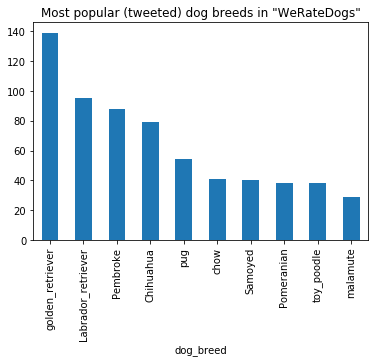

In [128]:
df.groupby('dog_breed').tweet_id.count().nlargest(10).plot(kind='bar', title='Most popular (tweeted) dog breeds in "WeRateDogs"')

##### From that picture we can say the most popular 4 dog breeds are 'golden_retriever', 'Labrador_retriever', 'Pembroke' and 'Chihuahua' in "WeRateDogs"

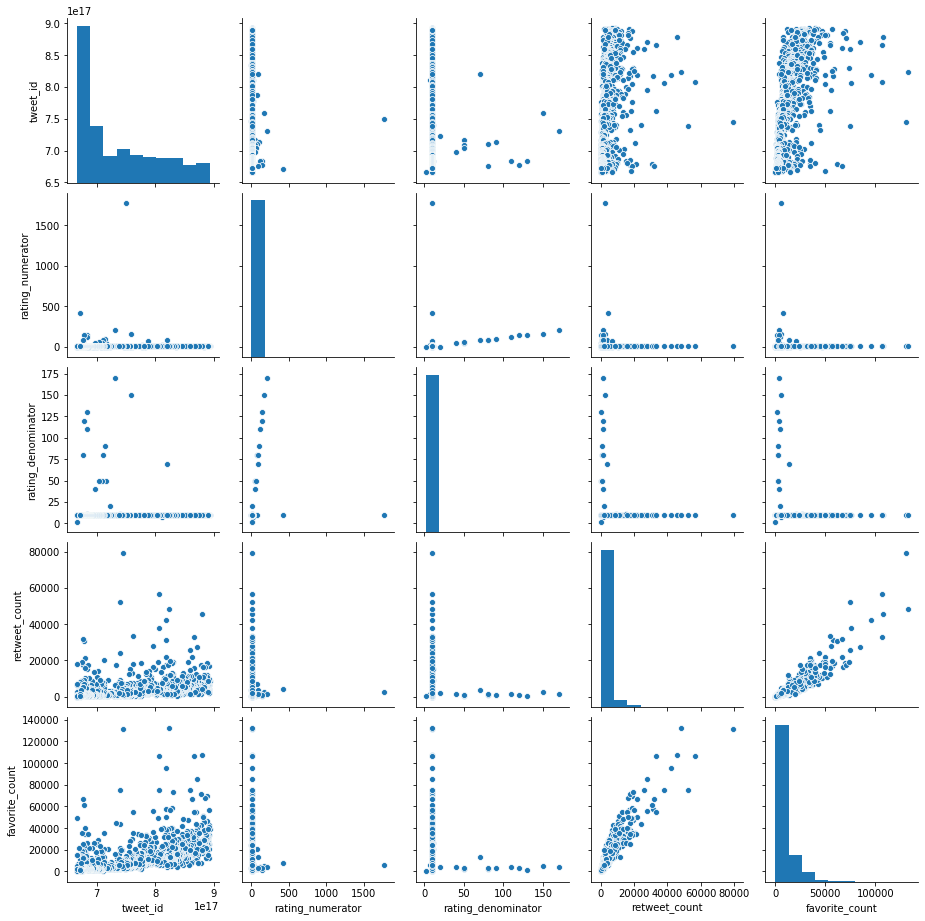

In [129]:
sb.pairplot(df)

##### Let's drop outliers in 'rating_numerator' and 'rating_denominator' columns in order to see their relationships with 'favourite_count' and 'retweet_count'.

In [130]:
df_not_outliers = df[(df.rating_numerator < 20) & (df.rating_denominator < 20) & (df.rating_numerator > 9) & 
               (df.rating_denominator > 9)]

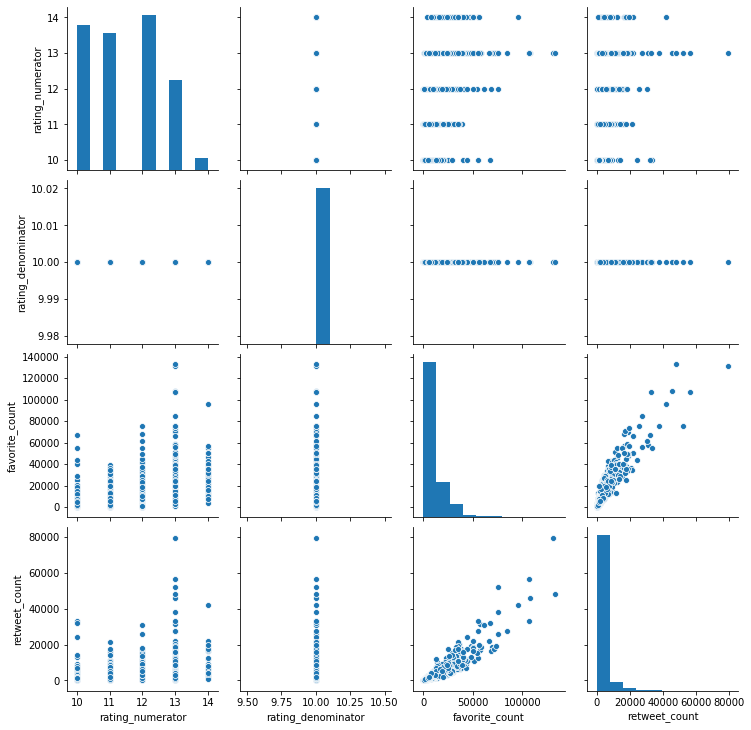

In [131]:
sb.pairplot(df_not_outliers[['rating_numerator', 'rating_denominator', 'favorite_count', 'retweet_count']])

#### From that picture we can see that 'rating_numerator' has a weak correlation with 'retweet_count' and 'favorite_count'

##### And we can calculate the correlations:

In [132]:
df_not_outliers.corr().loc['rating_numerator', 'retweet_count']

0.36320459836437186

In [133]:
df_not_outliers.corr().loc['rating_numerator', 'favorite_count']

0.4903595408665136

##### In order to calculate which dog breeds on average had most retweets and "favorite"s and higher ratings we will do the following operation:

In [135]:
df_not_outliers_avg = df_not_outliers.groupby('dog_breed').mean()

In [150]:
def bar_chart(x,y, x_label, y_label, title):
    x_labels = x
    y_labels = y
    plt.figure(figsize=(12, 6))
    plt.bar(x_labels, y_labels, width=0.6)
    plt.ylabel(y_label, fontweight='bold')
    plt.xlabel(x_label, fontweight='bold')
    plt.xticks(range(len(x_labels)), x_labels, rotation=75)
    plt.title(title, fontweight='bold')

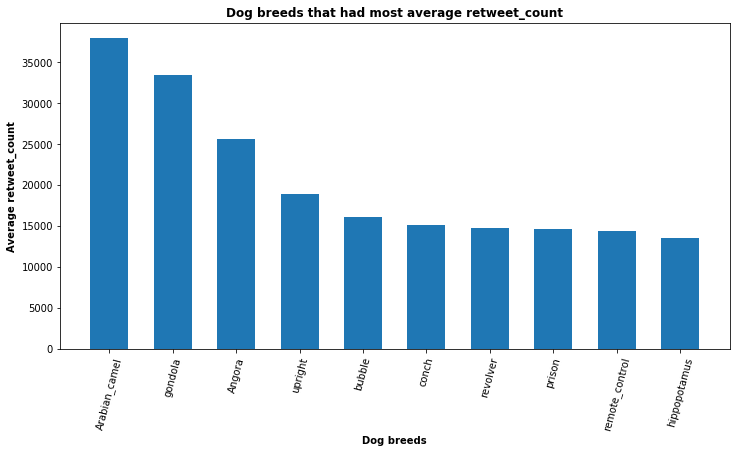

In [156]:
x = df_not_outliers_avg.nlargest(10, 'retweet_count')['retweet_count'].sort_values(ascending=False).index
y = df_not_outliers_avg.nlargest(10, 'retweet_count')['retweet_count'].sort_values(ascending=False)
x_label = 'Dog breeds'
y_label = 'Average retweet_count'
title = 'Dog breeds that had most average retweet_count'
bar_chart(x,y, x_label, y_label, title)

##### From that bar-chart it can be concluded that "Arabian_camel", "gondola" and "Angora" breeds had highest average retweet_count

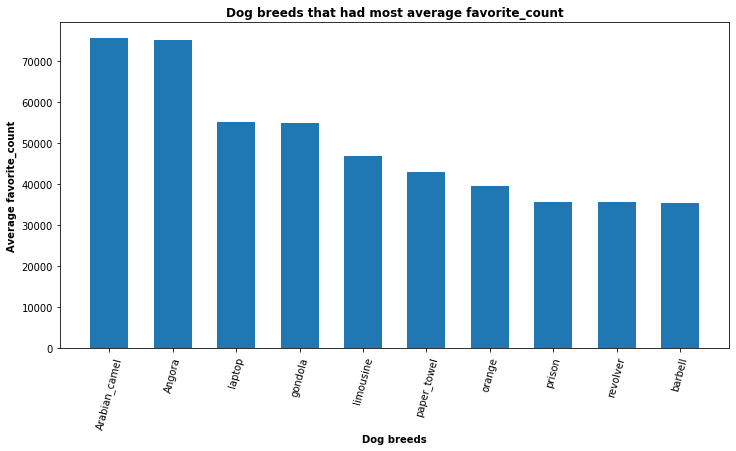

In [160]:
x = df_not_outliers_avg.nlargest(10, 'favorite_count')['favorite_count'].sort_values(ascending=False).index
y = df_not_outliers_avg.nlargest(10, 'favorite_count')['favorite_count'].sort_values(ascending=False)
x_label = 'Dog breeds'
y_label = 'Average favorite_count'
title = 'Dog breeds that had most average favorite_count'
bar_chart(x,y, x_label, y_label, title)

##### From that bar-chart it can be concluded that "Arabian_camel", "gondola" and "Angora" as well as "laptop" breeds had highest average favorite_count.

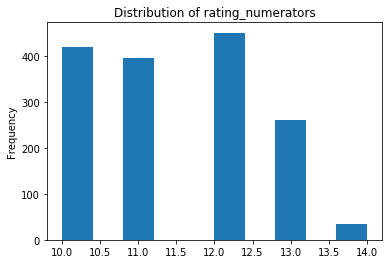

In [178]:
df_not_outliers['rating_numerator'].plot(kind='hist', x = 'rating_numerator', title='Distribution of rating_numerators')

#### From that picture we can say that dogs were rated in numerator mostly at 10, 11 and 12 ratings.